# Classification of Scenarioes - June 2023

This work aims at creating a multiclassification model to predict the emissions classiication of scenarioes from the GGM based on the AR6 DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
# read the dataset that has demand, emissions and classification categories
df = pd.read_csv('emissionseries_emissions_cat_merged_24August2022.csv')

In [3]:
df.head()

,Unnamed: 0,Model,Scenario,Region,Variable,Unit,2019,2020,2021,2022,...,2093,2094,2095,2096,2097,2098,2099,2100,Category,Category_name
0,0,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,8.130643,7.738276,7.503108,7.269501,...,2.022680,2.007340,1.992000,1.976660,1.961320,1.945980,1.930640,1.915300,C3,C3: limit warming to 2°C (>67%)
1,1,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,382.198514,380.730719,365.470232,350.213054,...,117.482740,116.862420,116.242100,115.621780,115.001460,114.381140,113.760820,113.140500,C3,C3: limit warming to 2°C (>67%)
2,2,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,855.912547,836.364378,821.034217,805.723117,...,347.671325,344.756572,341.845444,338.937940,336.034060,333.133803,330.237171,327.344163,C3,C3: limit warming to 2°C (>67%)
3,3,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,37800.549767,37462.666746,36683.892311,35905.865479,...,-188.421413,-238.245789,-288.070164,-337.894539,-387.718914,-437.543289,-487.367665,-537.192040,C3,C3: limit warming to 2°C (>67%)
4,4,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,2439.280541,2169.740677,1878.426691,1587.112706,...,-3480.564713,-3471.886089,-3463.207464,-3454.528839,-3445.850214,-3437.171589,-3428.492965,-3419.814340,C3,C3: limit warming to 2°C (>67%)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23411 entries, 0 to 23410
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     23411 non-null  int64  
 1   Model          23411 non-null  object 
 2   Scenario       23411 non-null  object 
 3   Region         23411 non-null  object 
 4   Variable       23411 non-null  object 
 5   Unit           23411 non-null  object 
 6   2019           23411 non-null  float64
 7   2020           23411 non-null  float64
 8   2021           23411 non-null  float64
 9   2022           23411 non-null  float64
 10  2023           23411 non-null  float64
 11  2024           23411 non-null  float64
 12  2025           23411 non-null  float64
 13  2026           23411 non-null  float64
 14  2027           23411 non-null  float64
 15  2028           23411 non-null  float64
 16  2029           23411 non-null  float64
 17  2030           23411 non-null  float64
 18  2031  

In [7]:
df.isnull().sum()

Unnamed: 0          0
Model               0
Scenario            0
Region              0
Variable            0
                 ... 
2098                0
2099                0
2100                0
Category         1708
Category_name    1708
Length: 90, dtype: int64

In [13]:
df.columns

Index(['Unnamed: 0', 'Model', 'Scenario', 'Region', 'Variable', 'Unit', '2019',
       '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028',
       '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037',
       '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046',
       '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055',
       '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064',
       '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073',
       '2074', '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082',
       '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090', '2091',
       '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099', '2100',
       'Category', 'Category_name'],
      dtype='object')

In [11]:
# it seems that the category column, the one of interest has a missing data, it should be removed. 

In [8]:
df_clean = df.dropna()

In [12]:
df.shape

(23411, 90)

In [10]:
df_clean.shape

(21703, 90)

In [15]:
# lets check that the emissions category column is full of all categorties (C1 to C8)
df_clean['Category'].unique().tolist()

['C3', 'C5', 'C6', 'C7', 'C4', 'C1', 'C2', 'C8']

Now, we are sure that the emissions category column ['Category'] has the 8 categories. Lets check the distributions of data points in this column. 

In [20]:
df_clean['Category'].value_counts()

C3    5480
C5    3859
C7    3049
C4    2817
C2    2393
C6    1801
C1    1677
C8     627
Name: Category, dtype: int64

<AxesSubplot:>

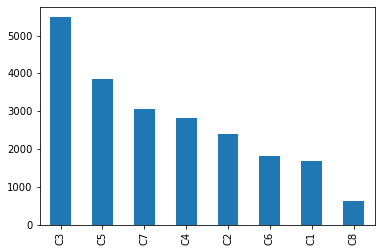

In [21]:
df_clean['Category'].value_counts().plot(kind = 'bar')

C8 is the least represented in the dataset. It can be omitted as it showsn scenarioes of very high emisisons and warming potential. 
Bu we can leave it and try the classification model with it and without it. 

## Re-arranging the dataset

The dataset is presented with time columns. However, we need the features as columns. Features for the classification of the global warming potential of scenarioes include GHG emissions, CO2 emisisons, energy demand (oil, gas, coal, renewables), and carbon removal technology scale. 

The dataset should be restructured to represent these features as column to start feature engineering of the dataset. 

In [26]:
# shorten the dataset into a shorter version with the values of interest
##NOTE: the dataset is on Global basis - the region is always 'World'

df_clean = df_clean[['Model', 'Scenario', 'Variable', 'Unit','2030', '2040', '2050', 'Category']]



In [27]:
df_clean.head()

,Model,Scenario,Variable,Unit,2030,2040,2050,Category
0,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,5.456829,4.237396,3.337359,C3
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,228.274770,172.269750,151.312704,C3
2,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,683.920550,585.632065,499.384203,C3
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,29708.564518,18913.013818,12965.258478,C3
4,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,-743.399175,-2306.007528,-2857.468480,C3


In [28]:
# convert df_clean into long format

df_l = df_clean.melt(id_vars = ['Model', 'Scenario', 'Variable', 'Unit', 'Category'],
                                    value_vars = ['2030', '2040','2050'],
                                    var_name = 'Year',
                                    value_name = 'Variable_Value')

In [25]:
# convert the long formate into a pivot formate with the variables at each year is a column

,Model,Scenario,Region,Variable,Unit,Category,Year,Variable_Value
0,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,C3,2030,5.456829
1,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C3,2030,228.274770
2,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,C3,2030,683.920550
3,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C3,2030,29708.564518
4,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,C3,2030,-743.399175
